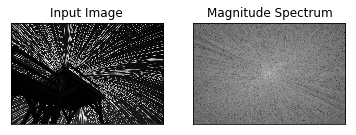

In [10]:
"""
Week 4: Fourier transform

(This example is taken from OpenCV tutorials
For more details see: https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_transforms/py_fourier_transform/py_fourier_transform.html)
"""

import numpy as np
import cv2
from matplotlib import pyplot as plt

# high frequency image
img = cv2.imread('E:\P-Project & Lab\OpenCV\IR.jpg', 0)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20 * np.log(np.abs(fshift))

plt.subplot(121), plt.imshow(img, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

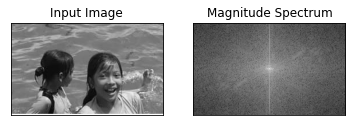

In [6]:
# low frequency image
img = cv2.imread('E:\P-Project & Lab\OpenCV\IR.jpg', 0)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum_ori = 20 * np.log(np.abs(fshift))

plt.subplot(121), plt.imshow(img, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(magnitude_spectrum_ori, cmap='gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

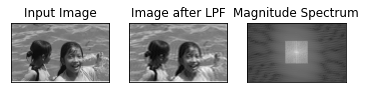

In [7]:
# denoising in frequency domain (removing high frequencies)
rows, cols = img.shape
crow, ccol = int(rows/2), int(cols/2)

# create a mask with center square is 1, remaining all zeros
mask = np.zeros((rows, cols), np.uint8)
mask[crow-30:crow+30, ccol-30:ccol+30] = 1

# apply mask and inverse DFT
fshift = fshift * mask
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

f = np.fft.fft2(img_back)
fshift = np.fft.fftshift(f)
magnitude_spectrum_lpf = 20 * np.log(np.abs(fshift))

plt.subplot(131), plt.imshow(img, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(img_back, cmap='gray')
plt.title('Image after LPF'), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(magnitude_spectrum_lpf, cmap='gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

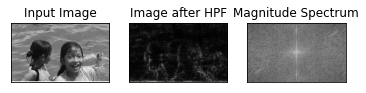

In [8]:
# remove low frequencies
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)

fshift[crow-30:crow+30, ccol-30:ccol+30] = 0
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

f = np.fft.fft2(img_back)
fshift = np.fft.fftshift(f)
magnitude_spectrum_hpf = 20 * np.log(np.abs(fshift))

plt.subplot(131), plt.imshow(img, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(img_back, cmap='gray')
plt.title('Image after HPF'), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(magnitude_spectrum_hpf, cmap='gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

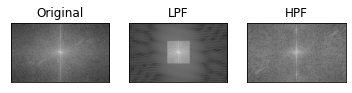

In [9]:
plt.subplot(131), plt.imshow(magnitude_spectrum_ori, cmap='gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(magnitude_spectrum_lpf, cmap='gray')
plt.title('LPF'), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(magnitude_spectrum_hpf, cmap='gray')
plt.title('HPF'), plt.xticks([]), plt.yticks([])
plt.show()